# PROJECT : Indian Road Accident analysis and Visualization


#### – The aim of this project is to analyse and visualize the overall road accident pattern in terms of types of vehicle involve , deadly weekday or hour, severity of accident, old age vehicle, types of road where frequent accident happens.
 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [25]:
df1 = pd.read_csv('AccidentsBig.csv')

In [26]:
df1.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Road_Surface_Conditions
0,1,Medium,1,1,3,17:42,6,30,1,1,2
1,2,High,1,1,4,17:36,3,30,5,4,1
2,3,High,2,1,5,0:15,6,30,0,4,1
3,4,High,1,1,6,10:35,6,30,0,1,1
4,5,High,1,1,2,21:13,6,30,0,7,2


In [27]:
#since most of the value here in dataframe is in coded digit ,we need to map and assign the new string value . 
map1 = {1:"highway",2:"primary road",3:"secondry road ",6:"residential road",7:"unpaved road",9:"special road"}
for i in range(len(df1['Road_Type'])):
    df1['Road_Type'][i]= map1[df1['Road_Type'][i]]
    

C:\Users\DELL\AppData\Local\Temp\ipykernel_14244\2920980897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Road_Type'][i]= map1[df1['Road_Type'][i]]


In [28]:
map2 = {0:"zebra",1:"signal cross",4:"overpass",5:"",7:"underpass",8:"refuge island"}
for i in range(len(df1['Pedestrian_Crossing-Physical_Facilities'])):
    df1['Pedestrian_Crossing-Physical_Facilities'][i]= map2[df1['Pedestrian_Crossing-Physical_Facilities'][i]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14244\2670893585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pedestrian_Crossing-Physical_Facilities'][i]= map2[df1['Pedestrian_Crossing-Physical_Facilities'][i]]


In [29]:
map3 = {1:"day light",4:"dark twilight",5:"on",6:"off",7:"dawn"}
for i in range(len(df1['Light_Conditions'])):
    df1['Light_Conditions'][i]= map3[df1['Light_Conditions'][i]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14244\3354703287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Light_Conditions'][i]= map3[df1['Light_Conditions'][i]]


In [30]:
map4 = {1:"dry",2:"wet",3:"snow cover",4:"icy"}
for i in range(len(df1['Road_Surface_Conditions'])):
    df1['Road_Surface_Conditions'][i]= map4[df1['Road_Surface_Conditions'][i]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14244\4267304310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Road_Surface_Conditions'][i]= map4[df1['Road_Surface_Conditions'][i]]


In [31]:
#here you see ,all the column has its obivious value.
df1

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Road_Surface_Conditions
0,1,Medium,1,1,3,17:42,residential road,30,signal cross,day light,wet
1,2,High,1,1,4,17:36,secondry road,30,,dark twilight,dry
2,3,High,2,1,5,0:15,residential road,30,zebra,dark twilight,dry
3,4,High,1,1,6,10:35,residential road,30,zebra,day light,dry
4,5,High,1,1,2,21:13,residential road,30,zebra,dawn,wet
...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,High,2,1,1,15:35,residential road,30,,day light,dry
2996,2997,High,2,1,4,21:45,residential road,30,,dark twilight,dry
2997,2998,High,1,1,6,15:25,residential road,30,zebra,day light,dry
2998,2999,High,2,1,5,16:36,residential road,30,,day light,dry


In [32]:
df1.rename(columns={'Accident_Index':'Accident index'},inplace= True)

In [33]:
df1.head(1)

,Accident index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Road_Surface_Conditions
0,1,Medium,1,1,3,17:42,residential road,30,signal cross,day light,wet


### read another dataset which consist vehicle and accident details

In [34]:
df2= pd.read_excel('Copy of VehiclesBig.xlsx')

In [35]:
missing_data = ["not provided",np.NAN]
df2= pd.read_excel('Copy of VehiclesBig.xlsx',na_values=missing_data)

In [36]:
df2

,Accident_Index,vehicle_Reference,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,2,1,side right,male,42,8268,3.0
1,3,1,side right,male,35,8300,5.0
2,4,2,side left,male,62,1762,6.0
3,5,1,front,female,49,1769,4.0
4,6,1,front,male,49,85,10.0
...,...,...,...,...,...,...,...
1533,2980,1,side right,male,53,885,7.0
1534,2982,1,side right,male,28,2494,5.0
1535,2986,1,front,male,28,1998,8.0
1536,2995,1,front,male,44,7300,2.0


In [37]:
#vehicle reference col is in coded form so fix it 
map5 = {1:"car",2:"motorcycle",3:"truck",4:"bus",5:"bicycle",6:"other"}
for i in range(len(df2['vehicle_Reference'])):
    df2['vehicle_Reference'][i]=map5[df2['vehicle_Reference'][i]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14244\1072689642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vehicle_Reference'][i]=map5[df2['vehicle_Reference'][i]]


In [38]:
df2.head()

,Accident_Index,vehicle_Reference,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,2,car,side right,male,42,8268,3.0
1,3,car,side right,male,35,8300,5.0
2,4,motorcycle,side left,male,62,1762,6.0
3,5,car,front,female,49,1769,4.0
4,6,car,front,male,49,85,10.0


In [39]:
df2.rename(columns={'Accident_Index':'Accident index'},inplace=True)

In [40]:
df2.head(1)

,Accident index,vehicle_Reference,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,2,car,side right,male,42,8268,3.0


### merging the above two dataframes df1,df2 for further analysis.

In [41]:
df3 = pd.merge(df1,df2,how='inner',on='Accident index')

In [42]:
df3

,Accident index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Road_Surface_Conditions,vehicle_Reference,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,2,High,1,1,4,17:36,secondry road,30,,dark twilight,dry,car,side right,male,42,8268,3.0
1,3,High,2,1,5,0:15,residential road,30,zebra,dark twilight,dry,car,side right,male,35,8300,5.0
2,4,High,1,1,6,10:35,residential road,30,zebra,day light,dry,motorcycle,side left,male,62,1762,6.0
3,5,High,1,1,2,21:13,residential road,30,zebra,dawn,wet,car,front,female,49,1769,4.0
4,6,High,2,1,3,12:40,residential road,30,zebra,day light,wet,car,front,male,49,85,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,2980,High,2,2,4,9:40,residential road,30,,day light,dry,car,side right,male,53,885,7.0
1534,2982,Medium,2,1,5,16:15,residential road,30,,day light,dry,car,side right,male,28,2494,5.0
1535,2986,High,2,1,7,13:32,residential road,30,,day light,dry,car,front,male,28,1998,8.0
1536,2995,High,2,1,6,11:11,primary road,30,,day light,dry,car,front,male,44,7300,2.0


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 0 to 1537
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Accident index                           1538 non-null   int64  
 1   Accident_Severity                        1538 non-null   object 
 2   Number_of_Vehicles                       1538 non-null   int64  
 3   Number_of_Casualties                     1538 non-null   int64  
 4   Day_of_Week                              1538 non-null   int64  
 5   Time                                     1538 non-null   object 
 6   Road_Type                                1538 non-null   object 
 7   Speed_limit                              1538 non-null   int64  
 8   Pedestrian_Crossing-Physical_Facilities  1538 non-null   object 
 9   Light_Conditions                         1538 non-null   object 
 10  Road_Surface_Conditions                  1538 no

### count the each accident severity level

In [45]:
df1['Accident_Severity'].value_counts()

High      2639
Medium     360
Low          1
Name: Accident_Severity, dtype: int64

### Accident Severity dipiction using histogram plot

<AxesSubplot:xlabel='Accident_Severity', ylabel='Count'>

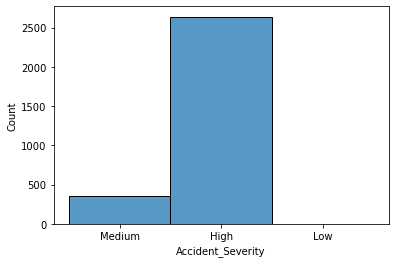

In [100]:
sns.histplot(df1['Accident_Severity'])
#here you see about 2600 cases lies under high severity

### what is the max no of casualties in a single accident on each road type?

In [46]:
df1.groupby('Road_Type').max('Number_of_Casualties')

,Accident index,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit
Road_Type,,,,,
highway,2960,3,4,7,30
primary road,2995,3,4,7,50
residential road,3000,5,8,7,40
secondry road,2981,5,4,7,60
special road,2436,2,1,7,30
unpaved road,2968,2,2,6,30


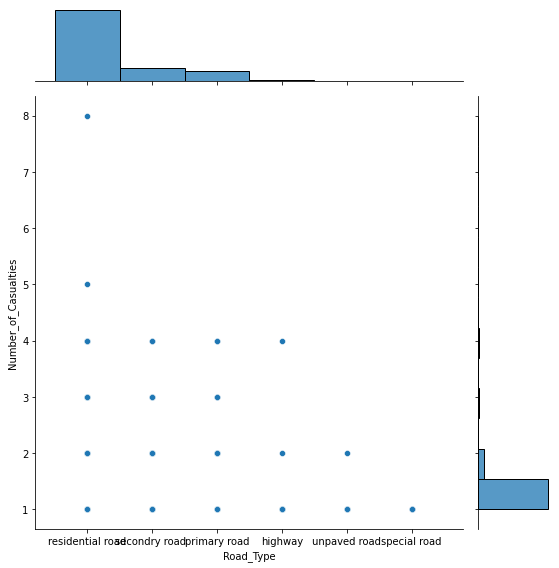

In [89]:
sns.jointplot(x='Road_Type',y='Number_of_Casualties',data=df1,height=8)
#here we see,maximum number of casualities takes place on residential roads followed by primary and secondary roads.

### what is the total no of casualties during bad light condititon from df1?

In [93]:
df1.groupby('Light_Conditions').count()['Number_of_Casualties']

Light_Conditions
dark twilight     942
dawn                7
day light        2039
off                 1
on                 11
Name: Number_of_Casualties, dtype: int64

### catagorical plot: light condition vs no. of casualties

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Light_Conditions', ylabel='Number_of_Casualties'>

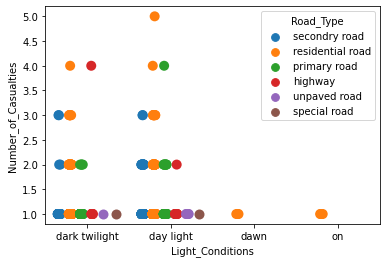

In [105]:
sns.stripplot(x='Light_Conditions',y='Number_of_Casualties',data=df3,hue='Road_Type',size=10,split=True)

# what are the total no of casualties during each vehicle type collision?

In [48]:
#data reveals that max casualtites happend due to car and motorcycle involvment 
df3.groupby('vehicle_Reference').count()['Number_of_Casualties']

vehicle_Reference
bicycle          1
bus              4
car           1054
motorcycle     436
truck           43
Name: Number_of_Casualties, dtype: int64

<AxesSubplot:xlabel='vehicle_Reference', ylabel='Age_of_Vehicle'>

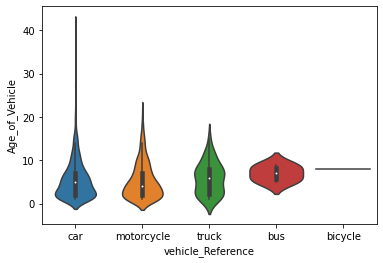

In [117]:
sns.violinplot(x='vehicle_Reference',y='Age_of_Vehicle',data=df3)
#violinplot shows many vehicle is of old age probably out of maintaince

 ### sort the death due to types of collision or 1st point of impact

In [49]:
df3.groupby('1st_Point_of_Impact').count()['Number_of_Casualties']

1st_Point_of_Impact
front           600
not reported      1
rear            185
side left       303
side right      309
unknown         140
Name: Number_of_Casualties, dtype: int64

In [50]:
#data reveals that 600 deaths are due to front collision.

### Total Number of accident that takes places after 18:00

In [51]:
df1[df1['Time']>= '18:00'].count()['Accident index']

1494

### Age of the vehicle more than 10 years ,involve in number of accidents

In [52]:
df3[df3['Age_of_Vehicle']>=10].value_counts('Age_of_Vehicle')


Age_of_Vehicle
10.0    48
11.0    45
12.0    28
13.0    24
15.0    23
14.0    16
16.0    13
18.0     5
17.0     4
20.0     4
19.0     3
21.0     2
27.0     2
23.0     1
40.0     1
41.0     1
dtype: int64

### matrix plot: heat map (vehicle impact ,type  and age of vehicle)

<AxesSubplot:xlabel='1st_Point_of_Impact', ylabel='vehicle_Reference'>

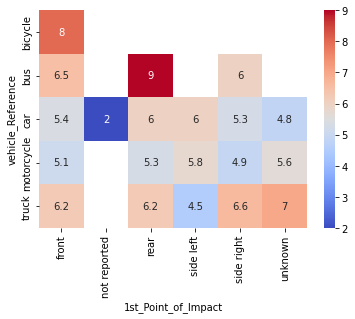

In [112]:
pv_table = df3.pivot_table(index='vehicle_Reference',columns='1st_Point_of_Impact',values='Age_of_Vehicle')
sns.heatmap(pv_table,cmap='coolwarm',linecolor='white',annot=True)

### sort the age of the driver involve in the accident

In [23]:

df3[df3['Age_of_Driver']>=60].value_counts('Age_of_Driver')

Age_of_Driver
63    12
60    11
62    11
64     8
65     8
67     8
61     8
66     7
72     7
70     6
68     4
73     3
75     3
77     2
81     2
80     2
71     2
69     2
78     1
74     1
83     1
85     1
dtype: int64

<AxesSubplot:xlabel='Age_of_Driver', ylabel='Count'>

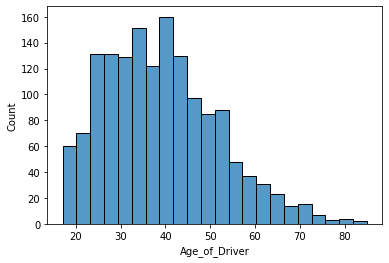

In [114]:
sns.histplot(df3['Age_of_Driver'])

### catagorical plot: week day accident visualization 

<AxesSubplot:xlabel='Day_of_Week', ylabel='Accident index'>

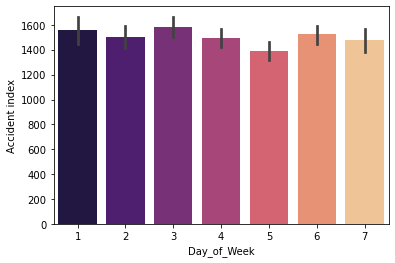

In [98]:
sns.barplot(x='Day_of_Week',y='Accident index',data=df1,palette='magma')

### conclusion: above analysis and vizualization clearly depicts insightful information about the dataset such as.
#### 1. Majority of the accident comes under high severity(2639) and 360 accidents cases under medium severity.
#### 2. majority of the vehicle involved in the accident are cars(1054) followed by bike (436).
#### 3. death due to front collision are 600.
#### 4. Total Number of accident that takes places after 18:00 are 1494.
#### 5. there are large number of old age vehicle(more than 10 year old) that involved in the accidents.

#### according to the above information , government can take strict traffic rule measures to deal with the accidents. good road infrastructure ,Pedestrian crossing physical facilities , light condition along with strict vehicle health rule ,these are the meaures need to be taken to reduces these figures